In [3]:
pip install tsfresh


Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
data = pd.read_csv('../data/merged_pod_data_v2.csv', header=0)
data = data.loc[:,data.columns != 'pod']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3434 non-null   int64  
 1   time       3434 non-null   int64  
 2   fd         3434 non-null   float64
 3   fs_usage   3434 non-null   float64
 4   socket     3434 non-null   float64
 5   thread     3434 non-null   float64
 6   cpu        3434 non-null   float64
 7   memory     3434 non-null   float64
 8   rss        3434 non-null   float64
 9   rx_bytes   3434 non-null   float64
 10  rx_errors  3434 non-null   float64
 11  tx_bytes   3434 non-null   float64
 12  tx_errors  3434 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 348.9 KB


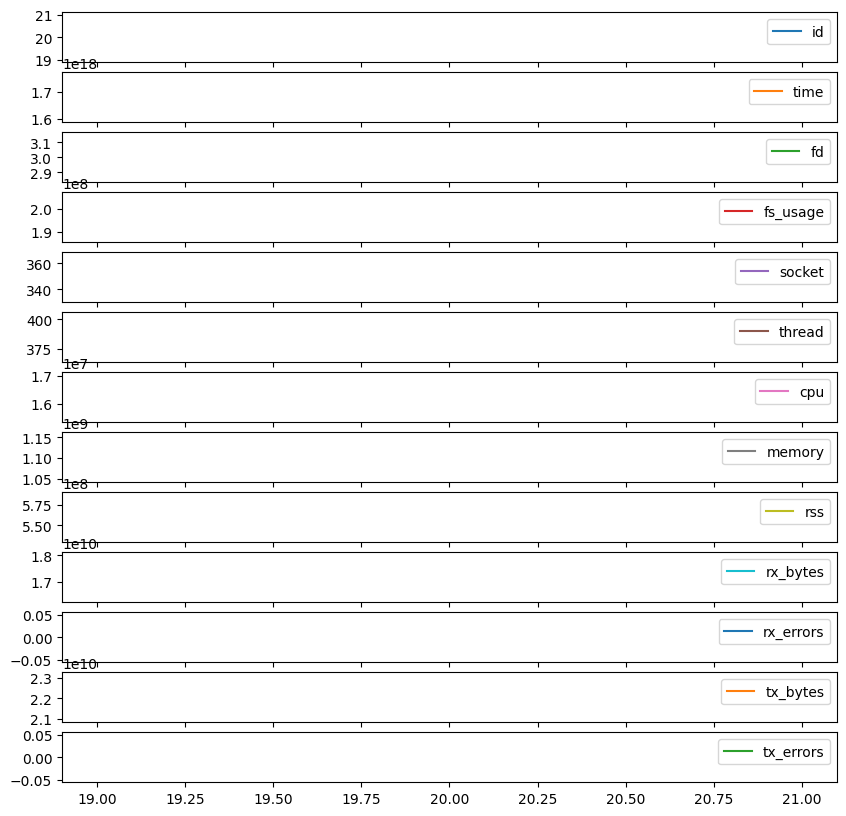

In [5]:
import matplotlib.pyplot as plt
data[data['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [80]:
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
extracted_features = extract_features(data, column_id="id", column_sort="time", default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 20/20 [01:35<00:00,  4.77s/it]


In [81]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, data['memory'])

/opt/homebrew/anaconda3/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['fd__mean_abs_change' 'fd__mean_change'
 'fd__mean_second_derivative_central' ...
 'tx_errors__permutation_entropy__dimension_7__tau_1'
 'tx_errors__query_similarity_count__query_None__threshold_0.0'
 'tx_errors__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [82]:
features_filtered

,cpu__quantile__q_0.9,cpu__quantile__q_0.4,cpu__quantile__q_0.3,cpu__quantile__q_0.2,cpu__quantile__q_0.1,cpu__minimum,cpu__absolute_maximum,cpu__maximum,cpu__root_mean_square,cpu__mean,...,socket__quantile__q_0.6,socket__quantile__q_0.7,socket__quantile__q_0.8,socket__quantile__q_0.9,"socket__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","socket__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","socket__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","socket__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",socket__quantile__q_0.3,"socket__fft_coefficient__attr_""real""__coeff_0"
0,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,...,349.170000,349.170000,349.170000,349.170000,214.142972,135.435907,95.767648,67.717954,349.170000,349.170000
1,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,...,349.170000,349.170000,349.170000,349.170000,214.142972,135.435907,95.767648,67.717954,349.170000,349.170000
2,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,...,349.170000,349.170000,349.170000,349.170000,214.142972,135.435907,95.767648,67.717954,349.170000,349.170000
3,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,1.622962e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,6.918177e+07,...,296.850000,296.850000,296.850000,296.850000,182.055564,115.142048,81.417723,57.571024,296.850000,296.850000
3430,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,...,381.066667,381.066667,381.066667,381.066667,233.704924,147.807972,104.516019,73.903986,381.066667,381.066667
3431,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,9.767546e+07,...,381.066667,381.066667,381.066667,381.066667,233.704924,147.807972,104.516019,73.903986,381.066667,381.066667
3432,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,9.952472e+07,...,382.200000,382.200000,382.200000,382.200000,234.399988,148.247569,104.826861,74.123785,382.200000,382.200000


In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ms = MinMaxScaler()
ss = StandardScaler()

Y = data.loc[:,['memory']]
X_ss = ss.fit_transform(features_filtered)
y_ms = ms.fit_transform(Y) 

X_train = X_ss[:2500, :]
X_test = X_ss[2500:, :]

y_train = y_ms[:2500, :]
y_test = y_ms[2500:, :] 

In [84]:

import tensorflow as tf

X_train_tensors_f = tf.reshape(X_train,   (X_train.shape[0], 1, X_train.shape[1]))
X_test_tensors_f = tf.reshape(X_test,  (X_test.shape[0], 1, X_test.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test.shape) 

Training Shape (2500, 1, 159) (2500, 1)
Testing Shape (934, 1, 159) (934, 1)


In [85]:
import numpy as np, os
import pandas as pd

import optuna

# https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/274717 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold

from IPython.display import display
EPOCH = 300
BATCH_SIZE = 1024
NUM_FOLDS = 10

DEBUG = False
TRAIN_MODEL = True
INFER_TEST = True
ONE_FOLD_ONLY = True
COMPUTE_LSTM_IMPORTANCE = True
# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# GET GPU STRATEGY
gpu_strategy = tf.distribute.get_strategy()

COLS = list(features_filtered.columns)
with gpu_strategy.scope():
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
    test_preds = []
    K.clear_session()
        
    
    checkpoint_filepath = f"folds.hdf5"
    if TRAIN_MODEL:
        model = keras.models.Sequential([
            keras.layers.Input(shape=X_train_tensors_f.shape[-2:]),
            keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
            keras.layers.Dense(128, activation='selu'),
            keras.layers.Dense(1),
        ])
        model.compile(optimizer="adam", loss="mae")

        lr = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=10, verbose=1)
        es = EarlyStopping(monitor="loss", patience=60, verbose=1, mode="min", restore_best_weights=True)
        sv = keras.callbacks.ModelCheckpoint(
            checkpoint_filepath, monitor='loss', verbose=1, save_best_only=True,
            save_weights_only=False, mode='auto', save_freq='epoch',
            options=None
        )
        model.fit(X_train_tensors_f, y_train,  epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])
        
    # else:
    #     model = keras.models.load_model('../input/finetune-of-tensorflow-bidirectional-lstm/'+checkpoint_filepath)


Epoch 1/300
3/3 [==============================] - ETA: 0s - loss: 0.1668
Epoch 1: loss improved from inf to 0.16676, saving model to folds.hdf5
3/3 [==============================] - 7s 468ms/step - loss: 0.1668 - lr: 0.0010
Epoch 2/300
3/3 [==============================] - ETA: 0s - loss: 0.0667
Epoch 2: loss improved from 0.16676 to 0.06666, saving model to folds.hdf5
3/3 [==============================] - 1s 451ms/step - loss: 0.0667 - lr: 0.0010
Epoch 3/300
3/3 [==============================] - ETA: 0s - loss: 0.0595
Epoch 3: loss improved from 0.06666 to 0.05948, saving model to folds.hdf5
3/3 [==============================] - 1s 446ms/step - loss: 0.0595 - lr: 0.0010
Epoch 4/300
3/3 [==============================] - ETA: 0s - loss: 0.0306
Epoch 4: loss improved from 0.05948 to 0.03058, saving model to folds.hdf5
3/3 [==============================] - 1s 457ms/step - loss: 0.0306 - lr: 0.0010
Epoch 5/300
3/3 [==============================] - ETA: 0s - loss: 0.0221
Epoch 5: l

In [86]:

print(' Predicting test data...')
test_preds.append(model.predict(X_test_tensors_f,verbose=0).squeeze().reshape(-1, 1).squeeze())
  

 Predicting test data...


 Computing LSTM feature importance...


100%|██████████| 159/159 [01:00<00:00,  2.62it/s]


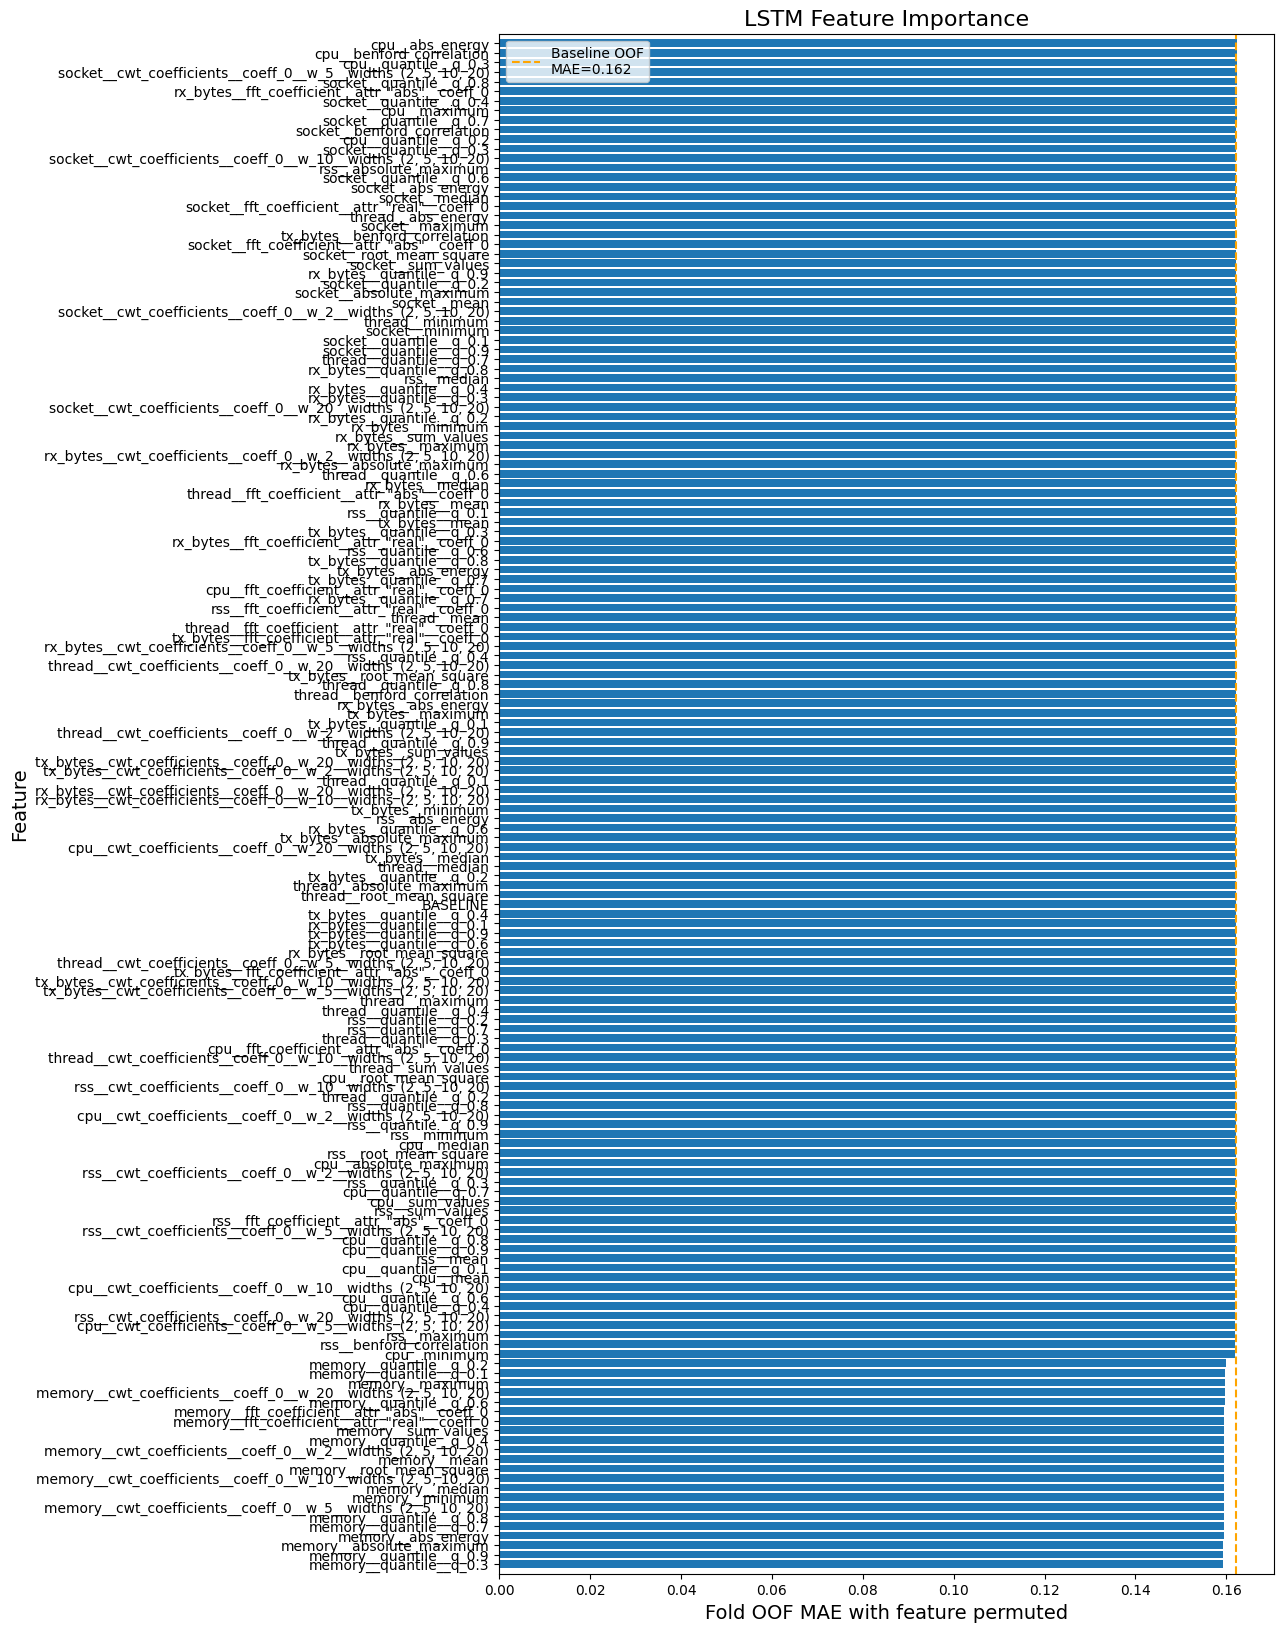

In [89]:
results = []
X_test_tensors_f = X_test_tensors_f.numpy()
print(' Computing LSTM feature importance...')

# COMPUTE BASELINE (NO SHUFFLE)
oof_preds = model.predict(X_test_tensors_f, verbose=0).squeeze() 
baseline_mae = np.mean(np.abs( oof_preds-y_test ))
results.append({'feature':'BASELINE','mae':baseline_mae})           

for k in tqdm(range(len(COLS))):

    # SHUFFLE FEATURE K
    save_col = X_test_tensors_f[:,:,k].copy()
    np.random.shuffle(X_test_tensors_f[:,:,k])
            
    # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
    oof_preds = model.predict(X_test_tensors_f, verbose=0).squeeze() 
    mae = np.mean(np.abs( oof_preds-y_test ))
    results.append({'feature':COLS[k],'mae':mae})
    X_test_tensors_f[:,:,k] = save_col

# DISPLAY LSTM FEATURE IMPORTANCE
print()
df = pd.DataFrame(results)
df = df.sort_values('mae')
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(COLS)+1),df.mae)
plt.yticks(np.arange(len(COLS)+1),df.feature.values)
plt.title('LSTM Feature Importance',size=16)
plt.ylim((-1,len(COLS)+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
            label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
plt.xlabel(f'Fold OOF MAE with feature permuted',size=14)
plt.ylabel('Feature',size=14)
plt.legend()
plt.show()
                    
# SAVE LSTM FEATURE IMPORTANCE
df = df.sort_values('mae',ascending=False)
df.to_csv(f'lstm_feature_importance.csv',index=False)  
# ONLY DO ONE FOLD

In [72]:
df.loc[df.mae >= baseline_mae]

,feature,mae
39,memory__quantile__q_0.1,0.204025
37,memory__quantile__q_0.3,0.202373
27,cpu__quantile__q_0.8,0.201515
15,memory__cwt_coefficients__coeff_0__w_20__width...,0.200160
51,cpu__cwt_coefficients__coeff_0__w_10__widths_(...,0.200025
...,...,...
95,tx_bytes__absolute_maximum,0.191046
21,rss__absolute_maximum,0.190976
96,tx_bytes__minimum,0.190946
155,socket__cwt_coefficients__coeff_0__w_5__widths...,0.190923


In [75]:
performance = {}
performance['lstm_model'] = model.evaluate(X_test_tensors_f, y_test, verbose=0)


In [76]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

lstm_model  : 0.0411


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ms = MinMaxScaler()
ss = StandardScaler()

Y = data.loc[:,['memory']]
X_ss = ss.fit_transform(features_filtered)
y_ms = ms.fit_transform(Y) 

X_train = X_ss[:2500, :]
X_test = X_ss[2500:, :]

y_train = y_ms[:2500, :]
y_test = y_ms[2500:, :] 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train_tensors_f.shape[-2:]),
    keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(1),
])
model.compile(optimizer="adam", loss="mae")

lr = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=10, verbose=1)
es = EarlyStopping(monitor="loss", patience=60, verbose=1, mode="min", restore_best_weights=True)
sv = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath, monitor='loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None
)
model.fit(X_train_tensors_f, y_train,  epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])


In [78]:
extracted_features.shape, X_train_tensors_f.shape

((3434, 8613), TensorShape([2500, 1, 159]))